In [13]:
import warnings

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import theano.tensor as tt
from scipy.stats import truncnorm

warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")
print(f"Running on PyMC3 v{pm.__version__}")
print(f"Running on ArviZ v{az.__version__}")

Running on PyMC3 v3.11.4
Running on ArviZ v0.11.4


In [219]:
# generate data
np.random.seed(3)
sd = 0.1
expectation_mu1 = 0.6
expectation_mu2 = 0.5
mu1_true = np.random.normal(loc=0.6,scale = sd)
mu2_true = np.random.normal(loc=0.5,scale = sd)
history1 = np.random.normal(expectation_mu1,sd,1000)
history2 = np.random.normal(expectation_mu2,sd,1000)


In [232]:
with pm.Model() as model:
    mu1 = pm.Normal("mu1", mu=mu1_true, sigma=sd)
    mu2 = pm.Normal("mu2", mu=mu2_true, sigma=sd)
    
    bandit1 = pm.Normal("bandit1",mu=mu1,sigma=sd,observed= history1)
    
    bandit2 = pm.Normal("bandit2",mu=mu2,sigma=sd,observed= history2)
    
    g = bandit2-bandit1
    idata = pm.sample(2000, return_inferencedata=True)
    print(np.mean(idata.posterior["mu1"]))
    print(np.mean(idata.posterior["mu2"]))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu2, mu1]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 2 seconds.


KeyError: 'g'

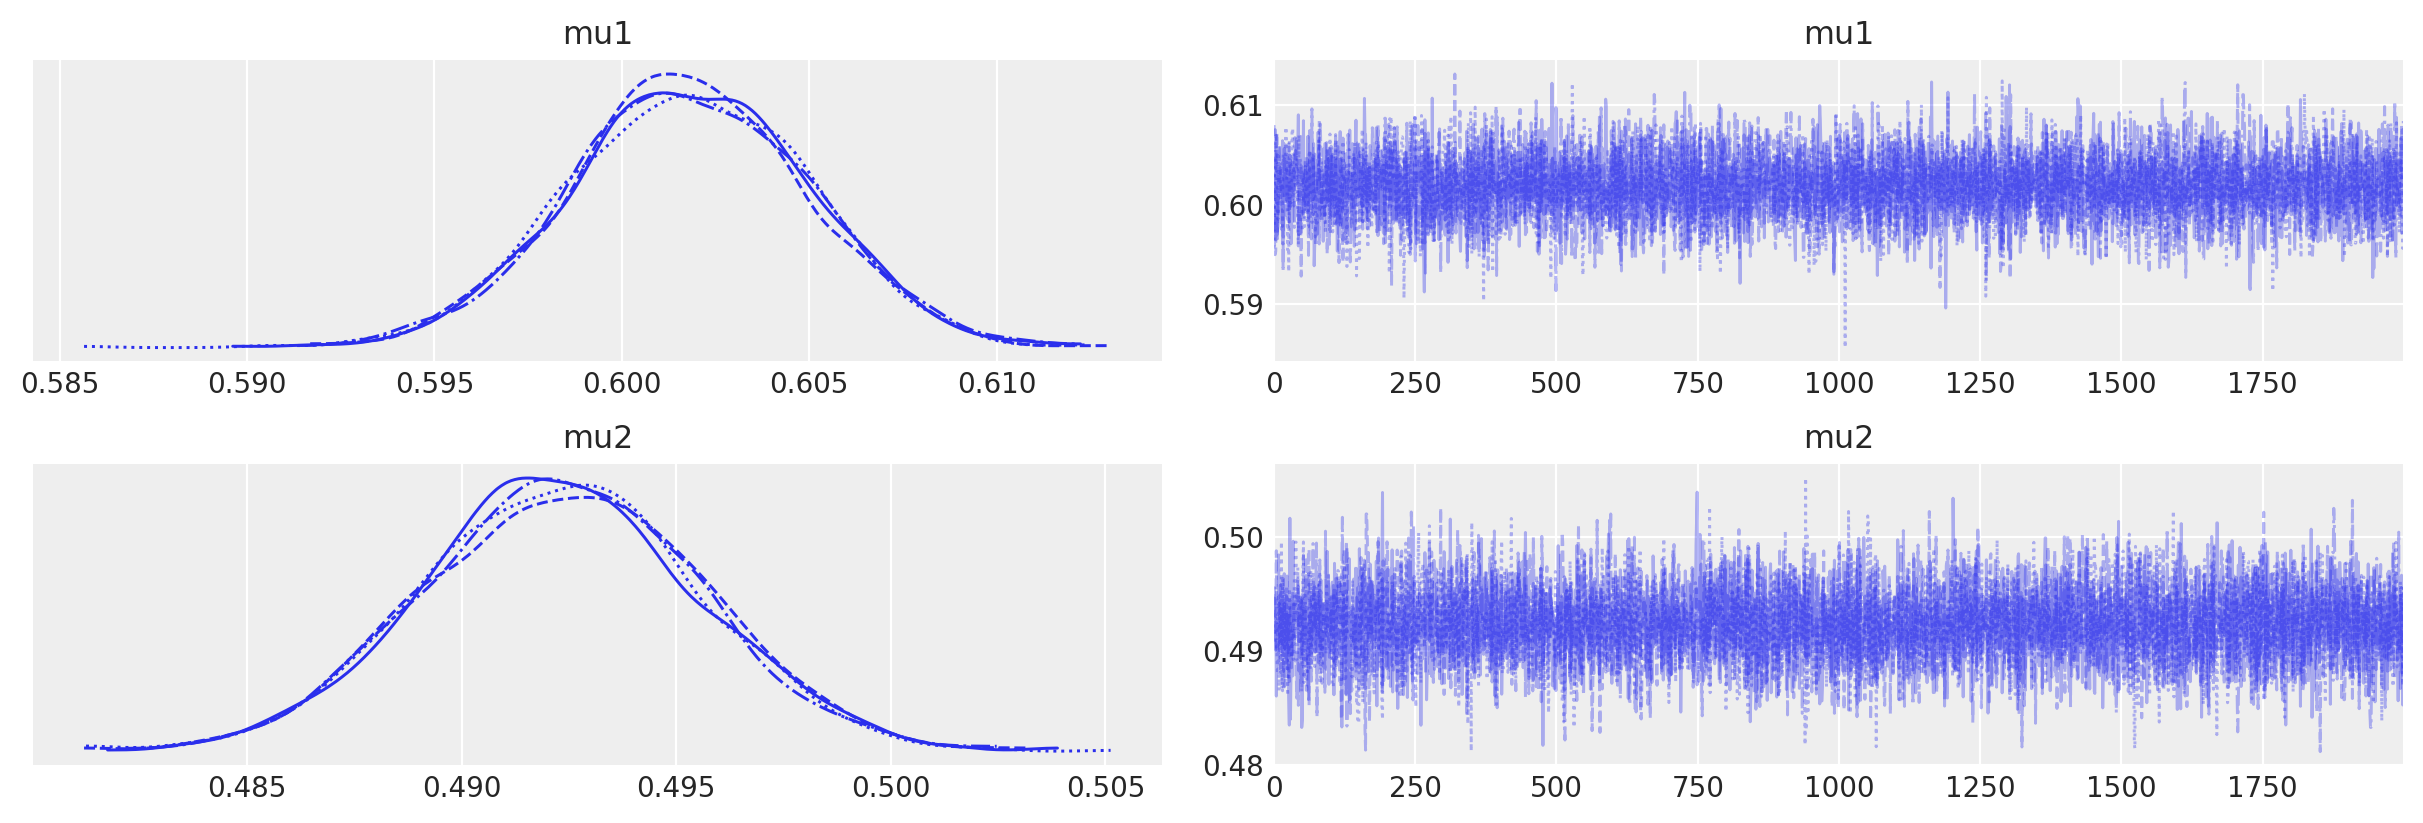

In [227]:
az.plot_trace(idata);



In [185]:
    idata = pm.sample(2000, tune=1500, return_inferencedata=True)

TypeError: No model on context stack.

In [6]:
model.logp({"mu": 0})

array(-144.6457262)